El presente código busca modelar una ecuación similar a la presentada por el meteorólogo Djann, siendo nuestro sistema a modelar el kilómetro 41 de la carretera de Hermosillo a Bahía de Kino, Sonora, con coordenadas geográficas en (Latitud = 28°55.117'N, Longitud = 111°18.638'W, Altitud = 101 metros).

PARTE 1

In [1]:
#Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
#Leemos el primer archivo con los datos meteorológicos
df1 = pd.DataFrame( pd.read_csv("meteo-vid-2018.csv", engine="python" ) )

In [3]:
df1.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [4]:
#Convertimos la variable 'albedo_Avg' en una variable numérica para poder trabajar con ella en la parte 2
df1['albedo_Avg'] = df1['albedo_Avg'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [5]:
#Contamos los valores NaN por columna
df1.isna().sum()

Date                1016
Time                1016
batt_volt_Min       1016
logger_temp         1016
short_up_Avg        1016
short_dn_Avg        1016
long_up_Avg         1016
long_dn_Avg         1016
cnr4_T_C_Avg        1016
cnr4_T_K_Avg        1016
long_up_corr_Avg    1016
long_dn_corr_Avg    1016
Rs_net_Avg          1016
Rl_net_Avg          1016
albedo_Avg          1109
Rn_Avg              1016
AirTC_Avg           1016
RH                  1016
WS_ms_S_WVT         1016
WindDir_D1_WVT      1403
WindDir_SD1_WVT     1019
Temp_C_Avg(1)       1016
Temp_C_Avg(2)       1016
Temp_C_Avg(3)       1016
Temp_C_Avg(4)       1016
H. suelo 60         1016
Result2_Avg         1016
T. suelo 60 cm      1016
Result4_Avg         1016
Result5_Avg         1016
Result6_Avg         1016
Result7_Avg         1016
Result8_Avg         1016
Result9_Avg         1016
Riego               1016
dtype: int64

In [6]:
df1.head()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,H. suelo 60,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego
0,06/01/2018,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,...,0.23,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0
1,06/01/2018,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,...,0.23,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0
2,06/01/2018,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,...,0.23,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0
3,06/01/2018,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,...,0.23,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0
4,06/01/2018,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,...,0.24,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0


In [7]:
#Creamos una nueva variable DATETIME a partir de las columnas Date y Time
df1["DATETIME"] = df1["Date"] + " " + df1["Time"]
df1.drop( ["Date","Time"], axis=1, inplace=True )

In [8]:
#Creamos una nueva variable FECHA del tipo datetime a partir de nuestra variable DATETIME
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['DATETIME'], 1), dayfirst=True)
df1 = df1.drop(['DATETIME'], 1)

In [9]:
df1.head()

,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,long_up_corr_Avg,long_dn_corr_Avg,...,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,FECHA
0,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,416.77,451.00,...,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0,2018-01-06 17:00:00
1,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,401.77,442.70,...,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0,2018-01-06 17:30:00
2,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,395.37,431.87,...,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0,2018-01-06 18:00:00
3,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,386.56,423.54,...,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0,2018-01-06 18:30:00
4,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,382.87,419.49,...,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0,2018-01-06 19:00:00


In [10]:
#Creamos una variable que indique el mes en el que se tomaron los datos
df1['MES'] = df1['FECHA'].dt.month
df1['DIA'] = df1['FECHA'].dt.day

In [11]:
df1.head()

,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,long_up_corr_Avg,long_dn_corr_Avg,...,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,FECHA,MES,DIA
0,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,416.77,451.00,...,75.80,0.04,14.16,13.37,14.46,13.46,0.0,2018-01-06 17:00:00,1.0,6.0
1,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,401.77,442.70,...,71.54,0.04,14.10,13.23,14.32,13.81,0.0,2018-01-06 17:30:00,1.0,6.0
2,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,395.37,431.87,...,70.38,0.04,14.31,13.12,14.51,13.84,0.0,2018-01-06 18:00:00,1.0,6.0
3,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,386.56,423.54,...,70.02,0.04,14.38,13.18,14.58,13.94,0.0,2018-01-06 18:30:00,1.0,6.0
4,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,382.87,419.49,...,70.00,0.04,14.41,13.32,14.60,14.11,0.0,2018-01-06 19:00:00,1.0,6.0


In [12]:
#Creamos dos variables que almacenen los valores máximos y mínimos de la temperatura diaria.
df1['AirTC_Avg_max'] = df1.groupby(['MES','DIA'])['AirTC_Avg'].transform('max')
df1['AirTC_Avg_min'] = df1.groupby(['MES','DIA'])['AirTC_Avg'].transform('min')

#Creamos dos variables que almacenen los valores máximos de la humedad relativa máximos y mínimos diarios
df1['RH_max'] = df1.groupby(['MES','DIA'])['RH'].transform('max')
df1['RH_min'] = df1.groupby(['MES','DIA'])['RH'].transform('min')

In [13]:
df1.head()

,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,long_up_corr_Avg,long_dn_corr_Avg,...,Result8_Avg,Result9_Avg,Riego,FECHA,MES,DIA,AirTC_Avg_max,AirTC_Avg_min,RH_max,RH_min
0,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,416.77,451.00,...,14.46,13.46,0.0,2018-01-06 17:00:00,1.0,6.0,27.75,16.03,46.27,20.61
1,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,401.77,442.70,...,14.32,13.81,0.0,2018-01-06 17:30:00,1.0,6.0,27.75,16.03,46.27,20.61
2,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,395.37,431.87,...,14.51,13.84,0.0,2018-01-06 18:00:00,1.0,6.0,27.75,16.03,46.27,20.61
3,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,386.56,423.54,...,14.58,13.94,0.0,2018-01-06 18:30:00,1.0,6.0,27.75,16.03,46.27,20.61
4,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,382.87,419.49,...,14.60,14.11,0.0,2018-01-06 19:00:00,1.0,6.0,27.75,16.03,46.27,20.61


In [14]:
#Creamos arreglos que almacenen los promedios mensuales de cada variable.
df1_prom_mes = pd.DataFrame()
df1_prom_mes['VELVPROM'] = df1.groupby(['MES'])['WS_ms_S_WVT'].transform('mean')
df1_prom_mes['TMAX'] = df1.groupby(['MES'])['AirTC_Avg_max'].transform('mean')
df1_prom_mes['TMIN'] = df1.groupby(['MES'])['AirTC_Avg_min'].transform('mean')
df1_prom_mes['TPROM'] = df1.groupby(['MES'])['AirTC_Avg'].transform('mean')
df1_prom_mes['RHMAX'] = df1.groupby(['MES'])['RH_max'].transform('mean')
df1_prom_mes['RHMIN'] = df1.groupby(['MES'])['RH_min'].transform('mean')
df1_prom_mes['RHPROM'] = df1.groupby(['MES'])['RH'].transform('mean')
df1_prom_mes['RADSOL'] = df1.groupby(['MES'])['Rn_Avg'].transform('mean')
df1_prom_mes['ALBEDO'] = df1.groupby(['MES'])['albedo_Avg'].transform('mean')

#Eliminamos los valores repetidos para quedarnos solamente con un valor por mes
df1_prom_mes = df1_prom_mes.drop_duplicates(subset=['VELVPROM','TMAX','TMIN','RHMAX','RHMIN','RHPROM','RADSOL','ALBEDO'])       

#Eliminamos las columnas que contengan valores NaN
df1_prom_mes = df1_prom_mes.dropna(how='any')

In [15]:
#Reiniciamos el índice
df1_prom_mes = df1_prom_mes.reset_index(drop=True)
df1_prom_mes

,VELVPROM,TMAX,TMIN,TPROM,RHMAX,RHMIN,RHPROM,RADSOL,ALBEDO
0,1.943827,27.341210,7.501276,16.963975,66.380848,14.056733,38.471432,34.734815,-0.423822
1,1.964189,25.320357,9.433214,17.230275,72.542857,25.725357,48.168006,56.250350,-0.479545
2,1.926196,29.519355,8.883548,19.282359,68.361613,15.204839,36.968353,92.894913,-0.409137
3,2.101812,32.671667,10.781667,21.880618,76.585000,15.712333,40.785667,134.012965,-0.386088
4,2.113918,34.133548,12.781290,23.650034,79.971935,17.229032,44.233468,162.405343,-0.367835
5,2.154986,36.968333,19.552667,28.416187,81.381333,25.799667,50.810507,163.926069,-0.381934
6,2.022204,38.419355,24.488387,31.065726,85.183226,32.805806,57.639805,157.534402,-0.189610
7,1.910853,36.985806,24.702581,30.120894,92.539677,42.205484,68.868454,151.273589,-0.381667
8,1.790326,37.576000,23.582333,29.661271,93.100000,36.606333,66.619750,136.749910,-0.486379
9,1.664435,31.346452,16.581613,23.254207,94.842581,37.131613,68.696082,95.513468,-0.614787


El dataframe anterior tiene la forma de las tablas presentadas por Djamann en su artículo. A continuación, realizaremos tres gráficas que muestren la variación de las temperaturas, humedad y radiación a lo largo del año.

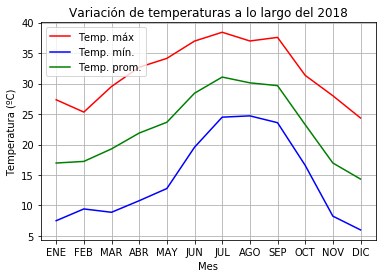

In [16]:
#Gráfica de variación temporal de temperaturas
MESES = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']

X = MESES                           #Eje X
N = np.arange(len(MESES))           #Longitud del arreglo de datos
Y1 = df1_prom_mes['TMAX']           #Valores a graficar en eje Y (1)
Y2 = df1_prom_mes['TMIN']           #Valores a graficar en eje Y (2)
Y3 = df1_prom_mes['TPROM']          #Valores a graficar en eje Y (3)

plt.plot(X, Y1, label="Temp. máx", color = 'r')            #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("Mes")                                           #Nombre del eje X
plt.ylabel("Temperatura (ºC)")                               #Nombre del eje Y

plt.grid()

plt.plot(Y2, label="Temp. mín.", color = 'b')             #Especificaciones para graficar nuestros datos en Y (2)

plt.plot(Y3, label="Temp. prom.", color = 'g')             #Especificaciones para graficar nuestros datos en Y (3)

plt.legend()                                                #Leyenda
plt.title('Variación de temperaturas a lo largo del 2018')  #Título de la gráfica
plt.savefig('tmensual',plt=2000)                            #Guardamos la gráfica como una imágen
plt.show()                                                  #Mostramos la gráfica

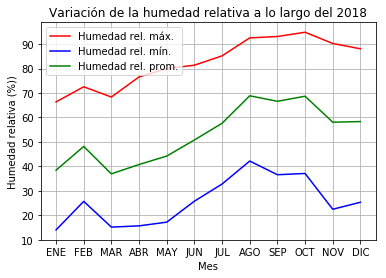

In [17]:
#Gráfica de variación temporal de la humedad relativa
X = MESES                           #Eje X
N = np.arange(len(MESES))           #Longitud del arreglo de datos
Y1 = df1_prom_mes['RHMAX']          #Valores a graficar en eje Y (1)
Y2 = df1_prom_mes['RHMIN']          #Valores a graficar en eje Y (2)
Y3 = df1_prom_mes['RHPROM']         #Valores a graficar en eje Y (3)

plt.plot(X, Y1, label="Humedad rel. máx.", color = 'r')   #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("Mes")                                           #Nombre del eje X
plt.ylabel("Humedad relativa (%))")                               #Nombre del eje Y

plt.grid()
plt.plot(Y2, label="Humedad rel. mín.", color = 'b')   #Especificaciones para graficar nuestros datos en Y (2)
plt.legend()                                                #Leyenda

plt.plot(Y3, label="Humedad rel. prom.", color = 'g')  #Especificaciones para graficar nuestros datos en Y (3)
plt.legend()                                                #Leyenda

plt.title('Variación de la humedad relativa a lo largo del 2018')  #Título de la gráfica
plt.savefig('rhmensual',plt=2000)                            #Guardamos la gráfica como una imágen
plt.show()                                                  #Mostramos la gráfica

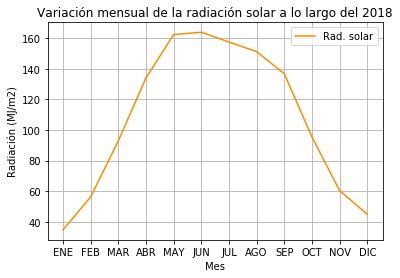

In [18]:
#Gráfica de variación temporal de temperaturas
X = MESES                           #Eje X
N = np.arange(len(MESES))           #Longitud del arreglo de datos
Y1 = df1_prom_mes['RADSOL']           #Valores a graficar en eje Y (1)

plt.plot(X, Y1, label="Rad. solar", color = 'darkorange')          #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("Mes")                                                         #Nombre del eje X
plt.ylabel("Radiación (MJ/m2)")                                           #Nombre del eje Y

plt.grid()

plt.legend()                                                              #Leyenda
plt.title('Variación mensual de la radiación solar a lo largo del 2018')  #Título de la gráfica
plt.savefig('radmensual',plt=2000)                                        #Guardamos la gráfica como una imágen
plt.show()                                                                #Mostramos la gráfica

PARTE 2

Con la tabla anterior, procederemos a calcular la Evapotranspiración mensual promedio (ET0), utilizando las siguientes
ecuaciones presentes en el texto de K. Djaman: 

Con esa tabla de valores procederemos a estimar la Evapotranspiración ET0 mensual promedio, utilizando las ecuaciones de los siguientes 3 autores que aparecen en el artículo de K. Djaman: 

- Ecuación 7 (Jansen & Haise, 1963):
   
    ET0 = (0.0252T + 0.078)Rs
    
    donde T es la temperatura promedio mensual y Rs es la radiación solar.
    
    
- Ecuación 31 (Valiantzas 1, 2012):

    ET0 = 0.0393 Rs (Tmean + 9.5)^0.5 - 0.19(Rs^0.6)(φ^0.15) + 0.0061(Tmean + 20)(1.11Tmean - Tmin - 2)^0.7
    
    donde Tmean es la temperatura promedio mensual, Tmin es la temperatura mínima promedio mensual, Rs es la 
    radiación solar promedio mensual y φ es la latitud en radianes.
    
    
- Ecuación 32 (Valiantzas 4, 2013):

    ET0 = 0.051(1 - α)Rs(Tmean + 9.5)^0.5 - 2.4(Rs/Ra)^2 + 0.048(Tmean + 20)(1 - RH/100)(0.5 + 0.536u2) + 0.00012z
    
    donde Tmean es la temperatura promedio mensual, Tmin es la temperatura mínima promesdio mensual, Rs es la radiación solar promedio, u2 es la velocidad del viento a 2m de altura, α es el albedo y Ra es la radiación solar en la parte alta de la atmósfera, dada por
    
    Ra = 24(60)/π (Gsc)(dr)(ωsinφsinδ + cosφcosδsinω)
    
    donde Ra es la radiación solar en la atmósfera
          Gsc es la constante solar (Gsc=0.0820 MJm^-2min^-1)
          dr = distancia relativa entre la Tierra y el Sol
          ω = ángulo de la hora donde se oculta el sol
          φ = latitud (rad)
          δ = declinación solar (rad)

In [19]:
#Calculamos la Evotranspiración promedio mensual (ET0) según la ecuación 7
ET07 = []
for i in range (0,len(df1_prom_mes)):
    ET07.append((0.0252*df1_prom_mes['TPROM'][i] + 0.078)*df1_prom_mes['RADSOL'][i])

In [20]:
#Calculamos la Evotranspiración promedio mensual (ET0) según la ecuación 31
φ = (math.pi/180)*28.94917
ET031 = []
for i in range (0,len(df1_prom_mes)):
    ET031.append(0.0393*df1_prom_mes['RADSOL'][i]*(df1_prom_mes['TPROM'][i] + 9.5)**0.5 - 0.19*(df1_prom_mes['RADSOL'][i]**0.6)*(φ**0.15) + 0.0061*(df1_prom_mes['TPROM'][i] + 20)*(1.11*df1_prom_mes['TPROM'][i] - df1_prom_mes['TMIN'][i] - 2)**0.7)

In [21]:
#Buscamos calcular la radiación atmosférica (Ra) para poder calcular la ecuación 34. Para esto, calculamos las variables
#necesarias:
dr = []
δ = []
ω = []

for m in range (0,len(df1_prom_mes)):
    α = df1_prom_mes['ALBEDO'][i]
    j = int(30.4*m - 15)
    dr.append(1 + 0.033*math.cos(((2*math.pi)/365)*j))
    δ.append(0.409*math.sin(((2*math.pi)/365)*j - 1.39))
    ω.append(math.acos(-math.tan(φ)*math.tan(0.409*math.sin(((2*math.pi)/365)*j - 1.39))))

In [22]:
#Convertimos los arreglos a valores numéricos y los almacenamos en un DataFrame de Variables
df_var = pd.DataFrame()
df_var['dr'] = dr
df_var['dr'] = df_var['dr'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_var['δ'] = δ
df_var['δ'] = df_var['δ'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_var['ω'] = ω
df_var['ω'] = df_var['ω'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

φ = (math.pi/180)*28.94917
df_var

,dr,δ,ω
0,1.031906,-0.407775,1.329507
1,1.031906,-0.370216,1.354428
2,1.023584,-0.236097,1.437322
3,1.008564,-0.033386,1.552321
4,0.991711,0.172248,1.667178
5,0.976615,0.336995,1.765832
6,0.968168,0.407488,1.811891
7,0.968023,0.371698,1.788131
8,0.976615,0.233213,1.702570
9,0.991162,0.036894,1.591215


In [23]:
#Calculamos Ra para cada mes
Ra = []
for i in range (0,len(df1_prom_mes)):
    Ra.append(((24*60)/math.pi)*0.0820*(df_var['ω'][i]*math.sin(φ)*math.sin(df_var['δ'][i]) + math.cos(φ)*math.cos(df_var['δ'][i])*math.sin(df_var['ω'][i])))

In [24]:
#Convertimos nuestro arreglo de Ra en valores numéricos
df_var['Ra'] = Ra
df_var['Ra'] = df_var['Ra'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [27]:
#Calculamos la Evotranspiración promedio mensual (ET0) según la ecuación 34
ET034 = [] 
for i in range (0,len(df1_prom_mes)):
    ET034.append(0.051*(1 - df1_prom_mes['ALBEDO'][i])*df1_prom_mes['RADSOL'][i]*(df1_prom_mes['TPROM'][i] + 9.5)**0.5 - 2.4*(df1_prom_mes['RADSOL'][i]/df_var['Ra'][i])**2 + 0.048*(df1_prom_mes['TPROM'][i] + 20)*(1 - df1_prom_mes['RHPROM'][i]/100)*(0.5 + 0.536*df1_prom_mes['VELVPROM'][i]) + 0.00012*101)